# 0. Описание задачи
    Задача данного датасета - научить машину определять вероятность инсульта (stroke) у человека по следующим признакам:

    1. Пол (gender), значения: "Женский" ("Female"), "Мужской" ("Male"), "Другой" ("Other")
    2. Возраст (age)
    3. Наличие или отсутствие артериальной гипертензии (hypertension), значения: "1", если есть; "0", если нет
    4. Наличие или отсутствие сердечных заболеваний (heart_disease), значения: "1", если есть; "0", если нет
    5. Состояли ли когда-нибудь в браке (ever_married), значения: "да" ("Yes"), "нет" ("No")
    6. Тип занятости (work_type), значения: "частный труд" ("Private"), "самозанятость" ("Self-employed"), "ребёнок" ("children"), "государственная служба" ("Govt_job"), "никогда не работал" ("Never_worked")
    7. Место жительства (Residence_type), значения: "город" ("Urban"), "сельская местность" ("Rural")
    8. Содержание сахара в крови (avg_glucose_level) (в мг/дл)
    9. Индекс массы тела (bmi) (в кг/м^2)
    10. Статус курения (smoking_status), значения: "раньше курил" ("formerly smoked"), "никогда не курил" ("never smoked"), "курит" ("smokes").

# 1. Чтение данных
Подключим все необходимые модули и загрузим датасет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
data_raw = pd.read_csv('healthcare-dataset-stroke-data.csv')

Файл csv был скачан с https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.

In [3]:
data_raw

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Датасет содержит 5110 объектов и 12 признаков, включая предсказываемый признак "инсульт" и уникальный идентификатор объекта.

In [4]:
data_raw.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# 2. Визуализация данных и вычисление основных характеристик

Рассмотрим зависимости одних признаков от других в виде множества точечных диаграмм и гистограмм. В качестве случайного подсета выберем подсет из 700 объектов.

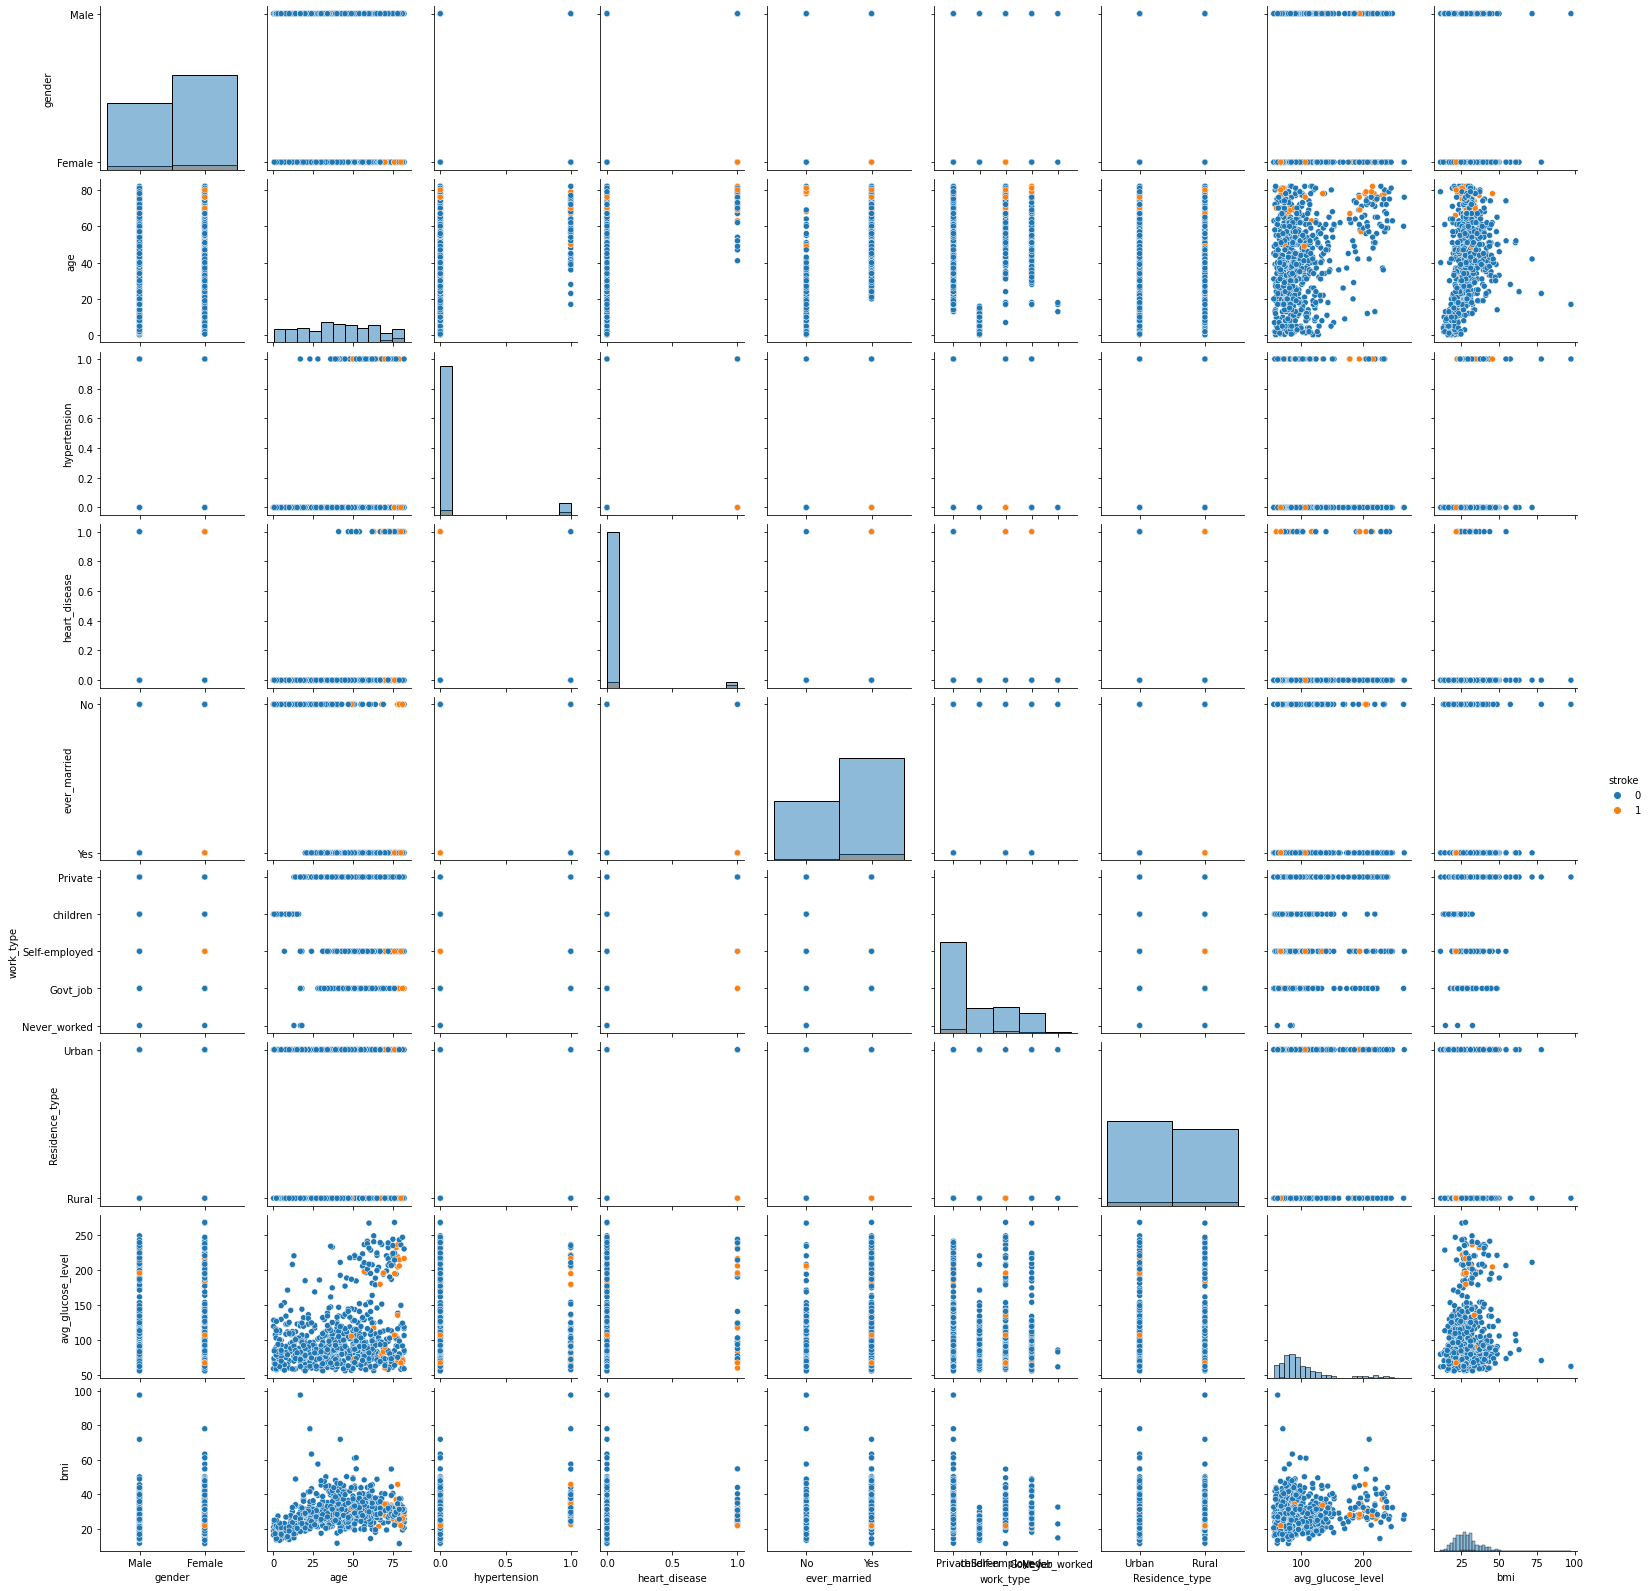

In [5]:
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=700, replace=False)
sns.pairplot(data_raw.iloc[random_subset], vars = data_raw.columns[1:10], hue='stroke', diag_kind='hist')
pass

Заметно, что в зоне наибольшего риска оказываются пожилые люди с достаточно большим индексом массы тела.

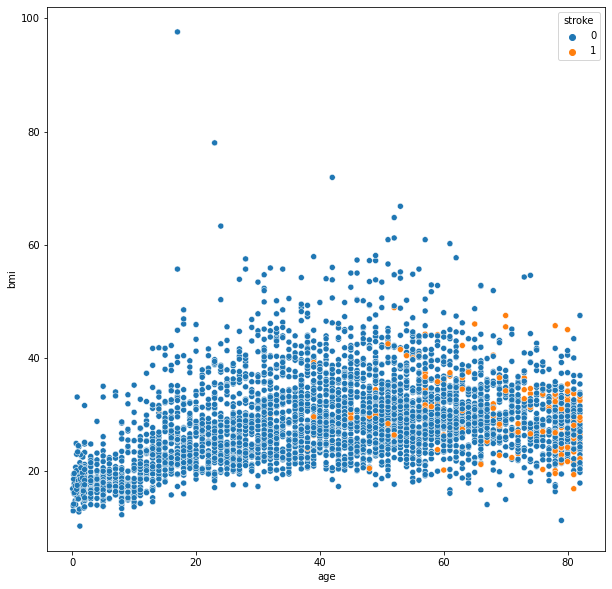

In [6]:
plt.figure(figsize = (10, 10))
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=4000, replace=False)
sns.scatterplot(data=data_raw.iloc[random_subset], x = "age", y = "bmi", hue="stroke")
pass

Вычислим основные характеристики данных.

In [7]:
data_raw.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и максимальное значения, медиана и значения других квартилей.

Средний возраст пациентов - 43 года, средний уровень сахара в крови - 106 мг/дл (в пределах нормы), средний индекс массы тела - 28 кг/м^2 (в пределах нормы).

Вычислим характеристики для категориальных признаков.

In [8]:
data_raw.describe(include = ["object"])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Построим матрицу корреляции.

In [9]:
corr_mat = data_raw.corr()
corr_mat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Наиболее заметна корреляция между возрастом человека и его индексом массы тела, между возрастом и наличием сердечных заболеваний, между возрастом и наличием артериальной гипертензии.

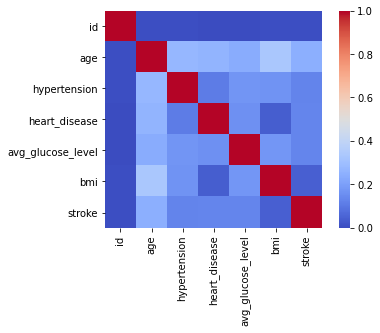

In [10]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

# 3. Обработка пропущенных значений

Обработаем пропущенные значения.

С первого взгляда на таблицу характеристик заметно, что пропущенные значения присутствуют в столбце индекса массы тела. 

In [11]:
data_raw.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Заполним пропущенные значения медианой.

In [12]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

In [13]:
data_raw.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# 4. Обработка категориальных признаков

Обработаем категориальные признаки. Их пять: "пол", "семейное положение", "тип занятости", "место жительства" и "статус курения".

In [14]:
data_raw['gender'].dtype

dtype('O')

In [15]:
data_raw['ever_married'].dtype

dtype('O')

In [16]:
data_raw['work_type'].dtype

dtype('O')

In [17]:
data_raw['Residence_type'].dtype

dtype('O')

In [18]:
data_raw['smoking_status'].dtype

dtype('O')

In [19]:
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['gender'].dtype

CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False)

In [20]:
data_raw['ever_married'] = data_raw['ever_married'].astype('category')
data_raw['ever_married'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [21]:
data_raw['work_type'] = data_raw['work_type'].astype('category')
data_raw['work_type'].dtype

CategoricalDtype(categories=['Govt_job', 'Never_worked', 'Private', 'Self-employed',
                  'children'],
, ordered=False)

In [22]:
data_raw['Residence_type'] = data_raw['Residence_type'].astype('category')
data_raw['Residence_type'].dtype

CategoricalDtype(categories=['Rural', 'Urban'], ordered=False)

In [23]:
data_raw['smoking_status'] = data_raw['smoking_status'].astype('category')
data_raw['smoking_status'].dtype

CategoricalDtype(categories=['Unknown', 'formerly smoked', 'never smoked', 'smokes'], ordered=False)

Заметим, что у признака "smoking_status" есть ещё одно значение "неизвестно" ("Unknown"). Это пропущенные значения, и их необходимо обработать.

In [24]:
data_raw['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Всего 1544 пропущенных значений

Заменим все "Unknown" на np.nan.

In [25]:
data_raw.loc[(data_raw['smoking_status']=='Unknown'), 'smoking_status'] = np.NaN

In [26]:
data_raw.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

И заполним пропущенные значения модой.

In [27]:
data_raw['smoking_status'].fillna(data_raw['smoking_status'].mode().iloc[0], inplace=True)

In [28]:
data_raw.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# 5. Нормализация

Чтобы алгоритмы из библиотеки scikit-learn без проблем работали с категориальными признаками, нужно закодировать их как числовые.

In [29]:
data_raw['ever_married'] = pd.factorize(data_raw['ever_married'])[0]

Теперь 0 для признака "состояли ли в браке" - "да", а 1 - "нет".

In [30]:
data_raw['Residence_type'] = pd.factorize(data_raw['Residence_type'])[0]

0 - место жительства "город", 1 - место жительства "селькая местность".

К категориальным (небинарным) признакам применим метод бинаризации.

In [31]:
work_type_dummies = pd.get_dummies(data_raw['work_type'])

In [32]:
work_type_dummies.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [33]:
data_raw = pd.concat((data_raw, work_type_dummies), axis=1)
data_raw = data_raw.drop(['work_type'], axis=1)

In [34]:
gender_dummies = pd.get_dummies(data_raw['gender'])

In [35]:
gender_dummies.head()

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [36]:
data_raw = pd.concat((data_raw, gender_dummies), axis=1)
data_raw = data_raw.drop(['gender'], axis=1)

In [37]:
smoking_status_dummies = pd.get_dummies(data_raw['smoking_status'])

In [38]:
smoking_status_dummies.head()

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [39]:
data_raw = pd.concat((data_raw, smoking_status_dummies), axis=1)
data_raw = data_raw.drop(['smoking_status'], axis=1)

In [40]:
data_raw

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,...,Private,Self-employed,children,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,0,0,228.69,36.6,1,0,...,1,0,0,0,1,0,0,1,0,0
1,51676,61.0,0,0,0,1,202.21,28.1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,31112,80.0,0,1,0,1,105.92,32.5,1,0,...,1,0,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,0,0,171.23,34.4,1,0,...,1,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,0,1,174.12,24.0,1,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,0,0,83.75,28.1,0,0,...,1,0,0,1,0,0,0,0,1,0
5106,44873,81.0,0,0,0,0,125.20,40.0,0,0,...,0,1,0,1,0,0,0,0,1,0
5107,19723,35.0,0,0,0,1,82.99,30.6,0,0,...,0,1,0,1,0,0,0,0,1,0
5108,37544,51.0,0,0,0,1,166.29,25.6,0,0,...,1,0,0,0,1,0,0,1,0,0


Нормализуем (стандартизуем) признаки.

In [42]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)

In [43]:
data_stand

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,...,Private,Self-employed,children,Female,Male,Other,Unknown,formerly smoked,never smoked,smokes
0,-1.298185,1.051331,-0.328570,4.184622,-0.723813,-0.983983,2.706111,1.004988,4.417948,-0.384073,...,0.864212,-0.436838,-0.394074,-1.189394,1.189873,-0.013989,NaN,2.184737,-1.432539,-0.427271
1,0.716301,0.785993,-0.328570,-0.238923,-0.723813,1.016078,2.121351,-0.098971,4.417948,-0.384073,...,-1.156897,2.288731,-0.394074,0.840600,-0.840261,-0.013989,NaN,-0.457631,0.697925,-0.427271
2,-0.255453,1.626231,-0.328570,4.184622,-0.723813,1.016078,-0.005028,0.472490,4.417948,-0.384073,...,0.864212,-0.436838,-0.394074,-1.189394,1.189873,-0.013989,NaN,-0.457631,0.697925,-0.427271
3,1.118254,0.255317,-0.328570,-0.238923,-0.723813,-0.983983,1.437217,0.719257,4.417948,-0.384073,...,0.864212,-0.436838,-0.394074,0.840600,-0.840261,-0.013989,NaN,-0.457631,-1.432539,2.339975
4,-1.646975,1.582008,3.042899,-0.238923,-0.723813,1.016078,1.501038,-0.631469,4.417948,-0.384073,...,-1.156897,2.288731,-0.394074,0.840600,-0.840261,-0.013989,NaN,-0.457631,0.697925,-0.427271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864005,1.626231,3.042899,-0.238923,-0.723813,-0.983983,-0.494609,-0.098971,-0.226305,-0.384073,...,0.864212,-0.436838,-0.394074,0.840600,-0.840261,-0.013989,NaN,-0.457631,0.697925,-0.427271
5106,0.394825,1.670454,-0.328570,-0.238923,-0.723813,-0.983983,0.420734,1.446571,-0.226305,-0.384073,...,-1.156897,2.288731,-0.394074,0.840600,-0.840261,-0.013989,NaN,-0.457631,0.697925,-0.427271
5107,-0.793642,-0.363806,-0.328570,-0.238923,-0.723813,1.016078,-0.511393,0.225723,-0.226305,-0.384073,...,-1.156897,2.288731,-0.394074,0.840600,-0.840261,-0.013989,NaN,-0.457631,0.697925,-0.427271
5108,0.048492,0.343763,-0.328570,-0.238923,-0.723813,1.016078,1.328127,-0.423665,-0.226305,-0.384073,...,0.864212,-0.436838,-0.394074,-1.189394,1.189873,-0.013989,NaN,2.184737,-1.432539,-0.427271


# 6. Отбор признаков

Для предсказания инсульта будем использовать все признаки, кроме идентификатора. Также исключим столбец значения статуса курения "неизвестно", которое было присвоено пропущенным значениям.

In [44]:
data_stand.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'Govt_job',
       'Never_worked', 'Private', 'Self-employed', 'children', 'Female',
       'Male', 'Other', 'Unknown', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

In [45]:
X = data_stand.drop(['stroke', 'id', 'Unknown'], axis=1)
y = data_raw['stroke']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3832, 1278)

# 7. Классификатор ближайших соседей

Для обучения машины воспользуемся методом kNN – k ближайших соседей. Для начала возьмём число соседей равное 10.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)

In [49]:
err_test

0.0594679186228482

In [50]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1202    2]
 [  74    0]]


Алгоритм успешно предсказал отсутствие инсульта в 1202 случаях, но ложно исключил вероятность инсульта в 74 случае. Также он ложно предсказал инсульт в 2 случаях. Ошибка составляет ~6%.

Подберём параметры, которые могли бы улучшить результаты алгоритма.

In [51]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04566742819843339 10


10 - оптимальное число соседей для данной задачи.

In [52]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.04488517745302714 0.0594679186228482


Ошибка на обучающей выборке при обучении машины с помощью метода kNN составляет ~4.5%, на тестовой - ~5.95%.

# 8. Случайный лес (Random Forest)

Воспользуемся ещё одним методом обучения машины - методом "Случайный лес", и сравним вероятности ошибки.

In [53]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.0594679186228482


Ошибка на тестовой выборке при обучении машины с помощью метода "Случайный лес" составляет ~5.87%. Это совсем не намного меньше вероятности ошибки при обучении машины с помощью метода kNN.

С помощью того же метода посчитаем важность всех признаков, по которым предсказывается инсульт.

In [54]:
importances = rf.feature_importances_
importances

array([2.41937136e-01, 2.85903300e-02, 3.08677141e-02, 2.09284429e-02,
       3.35819785e-02, 2.78607009e-01, 2.24324275e-01, 1.48963019e-02,
       2.19120745e-05, 1.97089734e-02, 1.74793921e-02, 1.23460087e-03,
       1.88826965e-02, 1.91460974e-02, 3.50909692e-07, 1.63214719e-02,
       1.89708226e-02, 1.45004948e-02])

In [55]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

avg_glucose_level    2.786070e-01
age                  2.419371e-01
bmi                  2.243243e-01
Residence_type       3.358198e-02
heart_disease        3.086771e-02
hypertension         2.859033e-02
ever_married         2.092844e-02
Private              1.970897e-02
Male                 1.914610e-02
never smoked         1.897082e-02
Female               1.888270e-02
Self-employed        1.747939e-02
formerly smoked      1.632147e-02
Govt_job             1.489630e-02
smokes               1.450049e-02
children             1.234601e-03
Never_worked         2.191207e-05
Other                3.509097e-07
dtype: float64

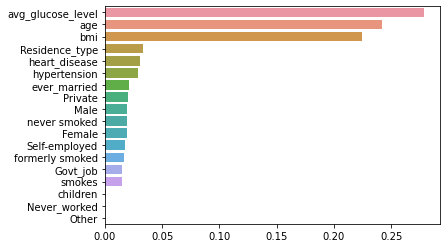

In [56]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# Вывод:
    Машина была обучена предсказывать инсульт на соответствующем датасете. По существующим данным пожилые люди с высоким индексом массы тела в зоне большего риска, чем все остальные. Самые важные признаки, которыми руководствовалась машина при предсказании исхода - содержание сахара в крови, возраст, индекс массы тела. Методы kNN и "Случайный лес" обучают машину предсказывать инсульт с примерно одинаковой точностью.
